## Activity 03: Filtering, Sorting, and Reshaping

Following up on the last activity, we are asked to deliver some more complex operations.   
We will, therefore, continue to work with the same dataset, our `normal_distribution.csv`.

#### Loading the dataset

In [4]:
# importing the necessary dependencies
import numpy as np

In [5]:
# loading the Dataset
dataset = np.genfromtxt('./data/normal_distribution.csv', delimiter=',')

In [6]:
dataset

array([[ 99.14931546, 104.03852715, 107.43534677,  97.85230675,
         98.74986914,  98.80833412,  96.81964892,  98.56783189,
        101.34745901],
       [ 92.02628776,  97.10439252,  99.32066924,  97.24584816,
         92.9267508 ,  92.65657752, 105.7197853 , 101.23162942,
         93.87155456],
       [ 95.66253664,  95.17750125,  90.93318132, 110.18889465,
         98.80084371, 105.95297652,  98.37481387, 106.54654286,
        107.22482426],
       [ 91.37294597, 100.96781394, 100.40118279, 113.42090475,
        105.48508838,  91.6604946 , 106.1472841 ,  95.08715803,
        103.40412146],
       [101.20862522, 103.5730309 , 100.28690912, 105.85269352,
         93.37126331, 108.57980357, 100.79478953,  94.20019732,
         96.10020311],
       [102.80387079,  98.29687616,  93.24376389,  97.24130034,
         89.03452725,  96.2832753 , 104.60344836, 101.13442416,
         97.62787811],
       [106.71751618, 102.97585605,  98.45723272, 100.72418901,
        106.39798503,  95.4649

---

#### Filtering

To get better insights into our dataset, we want to only look at the value that fulfills certain conditions.   
Our client reaches out to us and asks us to provide lists of values that fulfills these conditions:
- all values greater than 105 (>105)
- all values that are between 90 and 95 (>90 and <95)
- the indices of all values that have a delta of less than 1 to 100 (x-100 < 1)

In [10]:
# values that are greater than 105
vals_greater_five = dataset[dataset > 105]

In [11]:
# values that are between 90 and 95
vals_between_90_95 = np.extract((dataset > 90) & (dataset < 95), dataset)
vals_between_90_95

array([92.02628776, 92.9267508 , 92.65657752, 93.87155456, 90.93318132,
       91.37294597, 91.6604946 , 93.37126331, 94.20019732, 93.24376389,
       94.35373179, 92.5748759 , 91.37294597, 92.87730812, 93.87155456,
       92.75048583, 93.97853495, 91.32093303, 92.0108226 , 93.18884302,
       93.83969256, 94.5081787 , 94.59300658, 93.04610867, 91.6779221 ,
       91.37294597, 94.76253572, 94.57421727, 94.11176915, 93.97853495])

> **Note:**    
Conditional filtering can be done either using the brackets syntax or NumPys `extract` method

In [14]:
# indices of values that have a delta of less than 1 to 100
rows, cols = np.where(abs(dataset - 100) < 1)

one_away_indices = [[rows[index], cols[index]] for (index, _) in np.ndenumerate(rows)]
one_away_indices

[[0, 0],
 [1, 2],
 [3, 1],
 [3, 2],
 [4, 2],
 [4, 6],
 [6, 3],
 [6, 8],
 [8, 5],
 [9, 8],
 [10, 1],
 [10, 3],
 [10, 5],
 [12, 8],
 [13, 0],
 [13, 4],
 [13, 7],
 [14, 3],
 [14, 5],
 [15, 8],
 [16, 1],
 [16, 6],
 [17, 2],
 [17, 3],
 [18, 7],
 [18, 8],
 [20, 4],
 [21, 0],
 [21, 4],
 [21, 5],
 [22, 2],
 [23, 1],
 [23, 7]]

---

#### Sorting

They also want to experiment with some more plotting techniques so they ask you to also deliver these datasets:
- values sorted in ascending order for each row
- values sorted in ascending order for each column
- the matrix of indices indicating the position in a sorted list of each value   
```
[3, 1, 2, 5, 4]  =>  [1, 2, 0, 4, 3]
```

In [83]:
# values sorted for each row
row_sorted = np.sort(dataset)

> **Note:**   
By default, sorting will always be done along the last axis. In our case this is 1, leading to each row being sorted.

In [84]:
# values sorted for each column
col_sorted = np.sort(dataset, axis=0)

In [87]:
# indices of positions for each row
index_sorted = np.argsort(dataset)

---

#### Combining

After finishing their visualization and doing ask you to deliver a way they can incrementally add the split parts of the dataset to make sure it works with every subset, too.   
They want you to send them examples for:
- adding the second half of the first column
- adding the second column
- adding the third and last separate column


In [80]:
# split up dataset from activity03
thirds = np.hsplit(dataset, (3))
halfed_first = np.vsplit(thirds[0], (2))

# this is the part we've sent the client in activity03
halfed_first[0]

array([[ 99.14931546, 104.03852715, 107.43534677],
       [ 92.02628776,  97.10439252,  99.32066924],
       [ 95.66253664,  95.17750125,  90.93318132],
       [ 91.37294597, 100.96781394, 100.40118279],
       [101.20862522, 103.5730309 , 100.28690912],
       [102.80387079,  98.29687616,  93.24376389],
       [106.71751618, 102.97585605,  98.45723272],
       [ 96.02548256, 102.82360856, 106.47551845],
       [105.30350449,  92.87730812, 103.19258339],
       [110.44484313,  93.87155456, 101.5363647 ],
       [101.3514185 , 100.37372248, 106.6471081 ],
       [ 97.21315663, 107.02874163, 102.17642112]])

In [70]:
# adding the second half of the first column to the data
first_col = np.vstack([halfed_first[0], halfed_first[1]])

In [78]:
# adding the second column to our combined dataset
first_second_col = np.hstack([first_col, thirds[1]])

In [79]:
# adding the third column to our combined dataset
full_data = np.hstack([first_second_col, thirds[2]])

> **Note:**    
The same results can be achieved with `np.concatenate` and `np.stack`.    
For both methods, you need to provide the axis onto which it should be appended.   
Depending on your preferences you might want to use those.

---

#### Reshaping

For their internal AI algorithms, they need the dataset in a reshaped manner that reduces the number of columns.   
They asked us to deliver the whole dataset in the following shapes:
- reshaped in a one-dimensional list with all values
- reshaped in a matrix with only 2 columns

In [125]:
# reshaping to a list of values
single_list = np.reshape(dataset, (1, -1))

In [126]:
# reshaping to a matrix with two columns
two_col_dataset = dataset.reshape(-1, 2)

> **Note:**   
-1 in the dimension definition means that it figures out the other dimension on its own

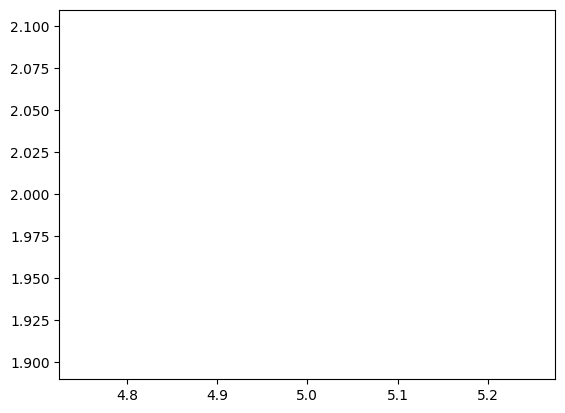

In [3]:
import matplotlib.pyplot as plt
plt.plot(5,2)
plt.show()